In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D
from matplotlib import colors as mcolors
import utils.plot as plot_utils

In [40]:
# ADM mass
def M_ADM(R, K):
    return 2 * R * (K - 1)


# rest mass
def M_rest(R, K, rho0):
    return 4 * np.pi * rho0 * K**6 * R**2


# conformal factor
def psi(r, R, K):
    if r < R:
        return K
    else:
        return 1 + (K - 1) * R / r

In [41]:
# solution curve M_ADM (M_rest) vs rho0 for 1 Dirac delta profile

R = 1.0
rho_c = 1 / (2 * np.pi * R) * 256 / 3125
K_c = 5 / 4
M_c = M_ADM(R, K_c)

rho_count = 10000
rho_min_order = -3
rho_vals = np.logspace(rho_min_order, np.log10(rho_c), rho_count)

In [42]:
# calculate solution curve data

x = []
y = []
z = []

for rho0 in rho_vals:
    coeffs = [1, 0, 0, 0, -0.5 / np.pi / rho0 / R, 0.5 / np.pi / rho0 / R]
    all_roots = np.roots(coeffs)
    real_roots = all_roots[np.isreal(all_roots)]
    positive_real_roots = real_roots[real_roots > 0]
    positive_real_roots = positive_real_roots.real

    valid_K_vals = positive_real_roots
    valid_M_ADM_vals = M_ADM(R, valid_K_vals)
    valid_M_rest_vals = M_rest(R, valid_K_vals, rho0)

    for adm, rest in zip(valid_M_ADM_vals, valid_M_rest_vals):
        x.append(rho0)
        y.append(adm)
        z.append(rest)

y_upper_branch = [_y for _y in y if _y >= M_c]
y_lower_branch = [_y for _y in y if _y <= M_c]

z_upper_branch = [z[i] for i, _y in enumerate(y) if _y >= M_c]
z_lower_branch = [z[i] for i, _y in enumerate(y) if _y <= M_c]

x_upper_branch = [x[i] for i, _y in enumerate(y) if _y >= M_c]
x_lower_branch = [x[i] for i, _y in enumerate(y) if _y <= M_c]

_x = []
_y = []
_z = []

for _rho0, _adm, _rest in zip(x, y, z):
    if _adm >= 2 * R:  # there is apparent horizon
        _x.append(_rho0)
        _y.append(_adm)
        _z.append(_rest)

y_upper_branch_ah = [_y for _y in y_upper_branch if _y >= 2 * R]
y_upper_branch_no_ah = [_y for _y in y_upper_branch if _y < 2 * R]

z_upper_branch_ah = [
    z_upper_branch[i] for i, _y in enumerate(y_upper_branch) if _y >= 2 * R
]
z_upper_branch_no_ah = [
    z_upper_branch[i] for i, _y in enumerate(y_upper_branch) if _y < 2 * R
]

x_upper_branch_ah = [
    x_upper_branch[i] for i, _y in enumerate(y_upper_branch) if _y >= 2 * R
]
x_upper_branch_no_ah = [
    x_upper_branch[i] for i, _y in enumerate(y_upper_branch) if _y < 2 * R
]

# apparent horizon starting point

hrho = x_upper_branch_ah[-1]
hM_ADM = y_upper_branch_ah[-1]
hrest_M = z_upper_branch_ah[-1]

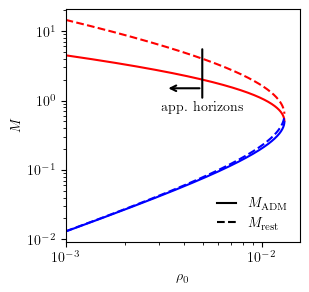

In [43]:
# plot solution curve

# scale = 0.4
width =  3.02419 # plot_utils.textwidth * plot_utils.cm_to_inch * scale
height =  3.02419 #width

# apparent horizon indicator
delta = 0.5
arrow_length = 0.7

fig = plt.figure(figsize=(width, height))

plt.plot(
    x_upper_branch,
    y_upper_branch,
    label=r"$M_{\text{ADM}}$",
    color="red",
    linewidth=1.5,
)
plt.plot(
    x_upper_branch,
    z_upper_branch,
    label=r"$M_{\text{rest}}$",
    color="red",
    linestyle="--",
    linewidth=1.5,
)
plt.plot(x_lower_branch, y_lower_branch, color="blue", linewidth=1.5)
plt.plot(x_lower_branch, z_lower_branch, color="blue", linestyle="--", linewidth=1.5)

plt.annotate(
    "",
    xy=(hrho, (1 - delta) * hM_ADM),
    xytext=(hrho, (1 + delta) * hrest_M),
    arrowprops=dict(arrowstyle="-", lw=1.5, ls="-", color="black"),
)

plt.annotate(
    "",
    xy=(hrho, (1 - 0.5 * delta) * hM_ADM),
    xytext=(
        hrho * (1 - 0.5 * arrow_length),
        (1 - 0.5 * delta) * hM_ADM,
    ),
    arrowprops=dict(arrowstyle="<-", lw=1.5, ls="-", color="black"),
)


plt.text(hrho, (1 - delta) * hM_ADM, "app. horizons", ha="center", va="top")

# universal label for dotted and solid lines
custom_handles = [
    Line2D(
        [0], [0], color="black", linestyle="-", linewidth=1.5, label=r"$M_{\text{ADM}}$"
    ),
    Line2D(
        [0],
        [0],
        color="black",
        linestyle="--",
        linewidth=1.5,
        label=r"$M_{\text{rest}}$",
    ),
]
plt.legend(
    handles=custom_handles,
    loc="lower right",
    fancybox=False,
    frameon=False,
    framealpha=1,
    handlelength=1.4,
)


plt.minorticks_on()
plt.xlabel(r"$\rho_0$")
plt.ylabel(r"$M$")
plt.xscale("log")
plt.yscale("log")
plt.xlim(left=np.min(x_lower_branch), right=rho_c * 1.2)


plt.savefig("img/1dirac_sol_curve.pdf", bbox_inches="tight", dpi=300)

In [44]:
# solution curve M_ADM (M_rest) vs R for 1 Dirac delta profile

rho0 = 1.0
R_c = 1 / (2 * np.pi * rho0) * 256 / 3125
rho_c = 1 / (2 * np.pi * R) * 256 / 3125
K_c = 5 / 4
M_c = M_ADM(R_c, K_c)
M_rest_c = M_rest(R_c, K_c, rho0)

samples = 10000
min_order = -5
R_vals = np.logspace(min_order, np.log10(R_c), samples)

In [45]:
# calculate solution curve data

x = []
y = []
z = []

for R in R_vals:

    coeffs = [1, 0, 0, 0, -0.5 / np.pi / rho0 / R, 0.5 / np.pi / rho0 / R]
    all_roots = np.roots(coeffs)
    real_roots = all_roots[np.isreal(all_roots)]
    positive_real_roots = real_roots[real_roots > 0]
    positive_real_roots = positive_real_roots.real
    valid_K_vals = positive_real_roots
    valid_M_ADM_vals = M_ADM(R, valid_K_vals)
    valid_M_rest_vals = M_rest(R, valid_K_vals, rho0)

    for adm, rest in zip(valid_M_ADM_vals, valid_M_rest_vals):
        x.append(R)
        y.append(adm)
        z.append(rest)


_x_wah = []
_y_wah = []
_z_wah = []
_x = []
_y = []
_z = []

for _r, _adm, _rest in zip(x, y, z):
    if _adm >= 2 * _r:  # there is apparent horizon
        _x_wah.append(_r)
        _y_wah.append(_adm)
        _z_wah.append(_rest)
    else:
        _x.append(_r)
        _y.append(_adm)
        _z.append(_rest)

_x = np.array(_x)
_y = np.array(_y)
_z = np.array(_z)

# _y vals less than M_c
_y_lower_branch = [_y for _y in _y if _y <= M_c]
_z_lower_branch = [_z for _z in _z if _z <= M_rest_c]
_x_lower_branch = [_x[i] for i, _y in enumerate(_y) if _y <= M_c]

_y_upper_branch = [_y for _y in _y if _y >= M_c]
_z_upper_branch = [_z for _z in _z if _z >= M_rest_c]
_x_upper_branch = [_x[i] for i, _y in enumerate(_y) if _y >= M_c]


_x_upper_branch.append(R_c)
_y_upper_branch.append(M_c)
_x_lower_branch.append(R_c)
_y_lower_branch.append(M_c)
_z_lower_branch.append(M_rest_c)
_z_upper_branch.append(M_rest_c)

hR = _x_wah[-1]
hM_ADM = _y_wah[-1]
hrest_M = _z_wah[-1]

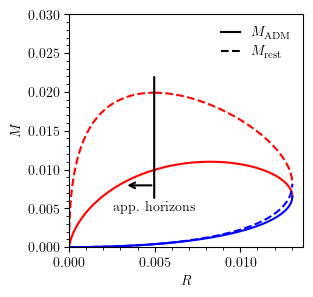

In [46]:
# plot solution curve

# scale = 0.4
width = 3.02419 # plot_utils.textwidth * plot_utils.cm_to_inch * scale
height =  3.02419 #width
delta = 0.4
arrow_length = 0.7

fig = plt.figure(figsize=(width, height))

plt.plot(
    _x_upper_branch,
    _y_upper_branch,
    label=r"$M_{\text{ADM}}$",
    color="red",
    linewidth=1.5,
)
plt.plot(
    _x_upper_branch,
    _z_upper_branch,
    label=r"$M_{\text{rest}}$",
    color="red",
    linestyle="--",
    linewidth=1.5,
)
plt.plot(_x_lower_branch, _y_lower_branch, color="blue", linewidth=1.5)
plt.plot(_x_lower_branch, _z_lower_branch, color="blue", linestyle="--", linewidth=1.5)
plt.plot(_x_wah, _y_wah, color="red", linewidth=1.5, alpha=1)
plt.plot(_x_wah, _z_wah, color="red", linewidth=1.5, linestyle="--", alpha=1)

plt.annotate(
    "",
    xy=(hR, (1 - delta) * hM_ADM),
    xytext=(hR, (1 + 0.3 * delta) * hrest_M),
    arrowprops=dict(arrowstyle="-", lw=1.5, ls="-", color="black"),
)

plt.annotate(
    "",
    xy=(hR, (1 - 0.5 * delta) * hM_ADM),
    xytext=(
        hR * (1 - 0.5 * arrow_length),
        (1 - 0.5 * delta) * hM_ADM,
    ),
    arrowprops=dict(arrowstyle="<-", lw=1.5, ls="-", color="black"),
)


plt.text(hR, (1 - delta) * hM_ADM, "app. horizons", ha="center", va="top")


custom_handles = [
    Line2D(
        [0], [0], color="black", linestyle="-", linewidth=1.5, label=r"$M_{\text{ADM}}$"
    ),
    Line2D(
        [0],
        [0],
        color="black",
        linestyle="--",
        linewidth=1.5,
        label=r"$M_{\text{rest}}$",
    ),
]
plt.legend(
    handles=custom_handles,
    loc="upper right",
    fancybox=False,
    frameon=False,
    framealpha=1,
    handlelength=1.4,
    ncol=1,
)


plt.xlim(left=0)
plt.ylim(bottom=0, top=0.03)
plt.xlabel(r"$R$")
plt.ylabel(r"$M$")
plt.minorticks_on()


plt.savefig("img/1dirac_sol_curve_R.pdf", bbox_inches="tight", dpi=300)

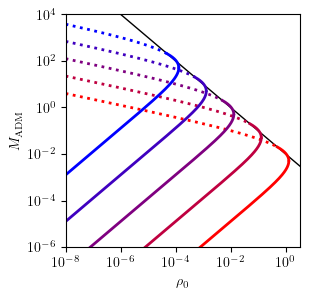

In [47]:
# calculate and plot multiple solution curves M_ADM vs rho_0 for 1 Dirac delta profile of various radii R

rho_count = 10000
rho_min_order = -8

R_vals = [0.01, 0.1, 1.0, 10.0, 100.0]
cmap = mcolors.LinearSegmentedColormap.from_list("rbmap", ["r", "b"])
colors = cmap(np.linspace(0, 1, len(R_vals)))

start_x = []
start_y = []

size = 3.02419
fig, ax = plt.subplots(figsize=(size, size))

for i, R in enumerate(R_vals):

    rho_c = 1 / (2 * np.pi * R) * 256 / 3125
    K_c = 5 / 4
    M_c = M_ADM(R, K_c)

    rho_vals = np.logspace(rho_min_order, np.log10(rho_c), rho_count)
    x = []
    y = []
    for rho0 in rho_vals:
        coeffs = [1, 0, 0, 0, -0.5 / np.pi / rho0 / R, 0.5 / np.pi / rho0 / R]
        all_roots = np.roots(coeffs)
        real_roots = all_roots[np.isreal(all_roots)]
        positive_real_roots = real_roots[real_roots > 0]
        positive_real_roots = positive_real_roots.real

        valid_K_vals = positive_real_roots
        valid_M_ADM_vals = M_ADM(R, valid_K_vals)

        for valid_val in valid_M_ADM_vals:
            x.append(rho0)
            y.append(valid_val)

    y_upper_branch = [_y for _y in y if _y >= M_c]
    y_lower_branch = [_y for _y in y if _y <= M_c]

    x_upper_branch = [x[i] for i, _y in enumerate(y) if _y >= M_c]
    x_lower_branch = [x[i] for i, _y in enumerate(y) if _y <= M_c]

    _x = []
    _y = []

    for _rho0, _m_adm in zip(x, y):
        if _m_adm >= 2 * R:  # there is apparent horizon
            _x.append(_rho0)
            _y.append(_m_adm)

    y_upper_branch_ah = [_y for _y in y_upper_branch if _y >= 2 * R]
    y_upper_branch_no_ah = [_y for _y in y_upper_branch if _y < 2 * R]
    x_upper_branch_ah = [
        x_upper_branch[i] for i, _y in enumerate(y_upper_branch) if _y >= 2 * R
    ]
    x_upper_branch_no_ah = [
        x_upper_branch[i] for i, _y in enumerate(y_upper_branch) if _y < 2 * R
    ]

    plt.plot(
        x_upper_branch_ah,
        y_upper_branch_ah,
        color=colors[i],
        linewidth=2,
        linestyle="dotted",
        alpha=1,
    )
    plt.plot(
        x_upper_branch_no_ah,
        y_upper_branch_no_ah,
        color=colors[i],
        linewidth=2,
        linestyle="solid",
        label=r"$R\,\approx\, $" + f"{R:.3g}",
    )
    plt.plot(
        x_lower_branch, y_lower_branch, color=colors[i], linewidth=2, linestyle="solid"
    )

    min_index = np.argmax(x_upper_branch_ah)
    start_x.append(x_upper_branch_ah[min_index])
    start_y.append(y_upper_branch_ah[min_index])


plt.xscale("log")
plt.yscale("log")
plt.xlabel(r"$\rho_0$")
plt.ylabel(r"$M_{\text{ADM}}$")

# plt.minorticks_on()

plt.xlim(left=10**rho_min_order)
plt.ylim(bottom=10 ** (-6), top=10**4)

# plot M_ADM = 1/(32 pi rho_0)
x_min, x_max = ax.get_xlim()
R_min = 1 / (2**6 * np.pi * x_max)
R_max = 1 / (2**6 * np.pi * x_min)
R_range = np.linspace(R_min, R_max, 100)
new_y = [2 * _r for _r in R_range]
new_x = [1 / (np.pi * _r * 2**6) for _r in R_range]
plt.plot(
    new_x,
    new_y,
    color="black",
    linestyle="solid",
    linewidth=1,
    label=r"$M_{\text{ADM}} = 1/(32\pi\rho_0)$",
    zorder=0.5,
)


# plt.legend(loc="lower right", fancybox=False, framealpha=1, frameon=False, ncol=2, handlelength=0.5, columnspacing=1, bbox_to_anchor=(1.0, -0.50))

plt.savefig("img/1dirac_sol_curves.pdf", dpi=300, bbox_inches="tight")

plt.show()

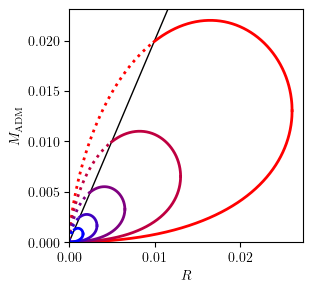

In [48]:
# calculate and plot multiple solution curves M_ADM vs R for 1 Dirac delta profile of various density aplitudes rho0

samples = 10000
min_order = -5

rho_vals = [0.5, 1, 2, 4, 8]
colors = cmap(np.linspace(0, 1, len(rho_vals)))

size = 3.02419
fig, ax = plt.subplots(figsize=(size, size))

for i, rho0 in enumerate(rho_vals):

    R_c = 1 / (2 * np.pi * rho0) * 256 / 3125
    R_vals = np.logspace(min_order, np.log10(R_c), samples)
    rho_c = 1 / (2 * np.pi * R) * 256 / 3125
    K_c = 5 / 4
    M_c = M_ADM(R_c, K_c)
    # print(f"R_c: {R_c}, M_c: {M_c}", "rho_c:", rho_c)

    x = []
    y = []
    for R in R_vals:

        coeffs = [1, 0, 0, 0, -0.5 / np.pi / rho0 / R, 0.5 / np.pi / rho0 / R]
        all_roots = np.roots(coeffs)
        real_roots = all_roots[np.isreal(all_roots)]
        positive_real_roots = real_roots[real_roots > 0]
        positive_real_roots = positive_real_roots.real
        valid_K_vals = positive_real_roots
        valid_M_ADM_vals = M_ADM(R, valid_K_vals)

        for valid_val in valid_M_ADM_vals:
            x.append(R)
            y.append(valid_val)

    _x_wah = []
    _y_wah = []
    _x = []
    _y = []

    for _r, _m_adm in zip(x, y):
        if _m_adm >= 2 * _r:  # there is apparent horizon
            _x_wah.append(_r)
            _y_wah.append(_m_adm)
        else:
            _x.append(_r)
            _y.append(_m_adm)
    _x = np.array(_x)
    _y = np.array(_y)

    # _y vals less than M_c
    _y_lower_branch = [_y for _y in _y if _y <= M_c]
    _x_lower_branch = [_x[i] for i, _y in enumerate(_y) if _y <= M_c]
    _y_upper_branch = [_y for _y in _y if _y >= M_c]
    _x_upper_branch = [_x[i] for i, _y in enumerate(_y) if _y >= M_c]

    _x_upper_branch.append(R_c)
    _y_upper_branch.append(M_c)
    _x_lower_branch.append(R_c)
    _y_lower_branch.append(M_c)

    plt.plot(
        _x_lower_branch,
        _y_lower_branch,
        color=colors[i],
        linewidth=2,
        linestyle="solid",
    )
    plt.plot(
        _x_upper_branch,
        _y_upper_branch,
        color=colors[i],
        linewidth=2,
        linestyle="solid",
        label=f"$\\rho_0 = {rho0:.1f}$",
    )

    plt.plot(_x_wah, _y_wah, color=colors[i], linewidth=2, linestyle="dotted", alpha=1)


original_ylims = ax.get_ylim()
_h_m = np.linspace(*original_ylims, 100)
_r_m = _h_m / 2
plt.plot(
    _r_m,
    _h_m,
    color="black",
    linestyle="solid",
    linewidth=1,
    label=r"$M_{\text{ADM}} = 2R$",
    zorder=0.5,
)

plt.xlim(left=0)
plt.ylim(0, original_ylims[1])

# plt.minorticks_on()
plt.xlabel(r"$R$")
plt.ylabel(r"$M_{\text{ADM}}$")

# plt.legend(loc="lower center", fancybox=False, framealpha=1, frameon=False, ncol=2, handlelength=1, columnspacing=1, bbox_to_anchor=(0.5, -0.50))

plt.savefig("img/1dirac_sol_curves_R.pdf", dpi=300, bbox_inches="tight")
plt.show()